In [3]:
from google.colab import files
uploaded = files.upload()

Saving housing.csv to housing.csv


#Data Cleaning & Feature Engiineering

In [59]:
import pandas as pd
df=pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [60]:
df.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [61]:
df.dropna(inplace=True)

In [62]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [63]:
df=df.join(pd.get_dummies(df.ocean_proximity,dtype=int))

In [64]:
df.drop('ocean_proximity',axis=1,inplace=True)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'median_house_value'}>,
        <Axes: title={'center': '<1H OCEAN'}>,
        <Axes: title={'center': 'INLAND'}>,
        <Axes: title={'center': 'ISLAND'}>],
       [<Axes: title={'center': 'NEAR BAY'}>,
        <Axes: title={'center': 'NEAR OCEAN'}>, <Axes: >, <Axes: >]],
      dtype=object)

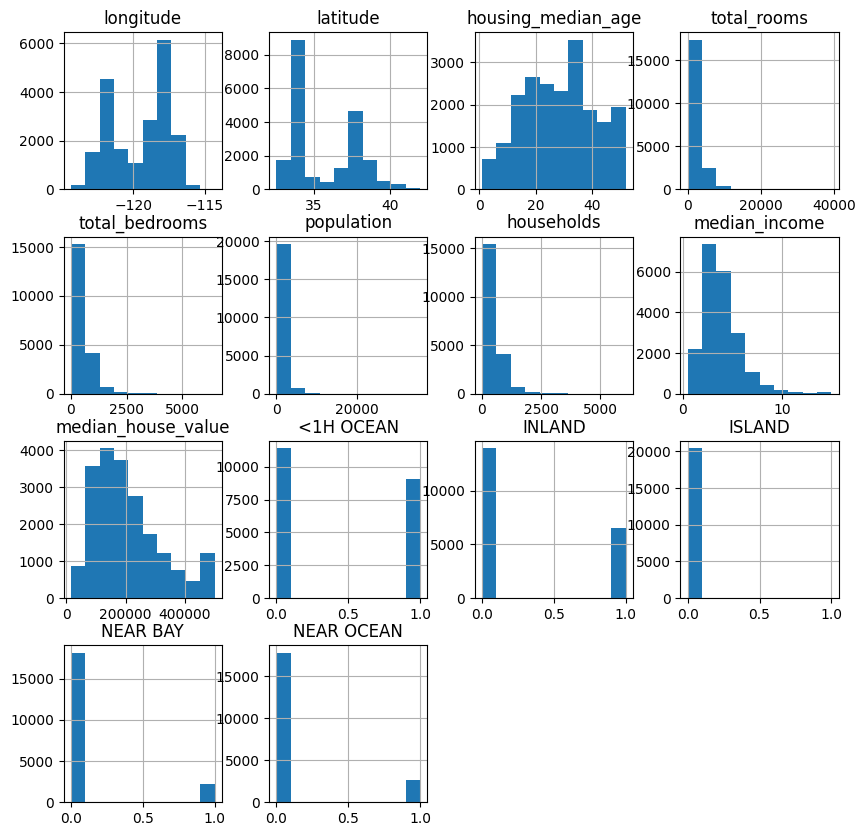

In [65]:
df.hist(figsize=(10,10))

In [66]:
 df['bedroom_ratio']=df['total_bedrooms']/df['total_rooms']
df['household_rooms']=df['total_rooms']/df['households']

<Axes: >

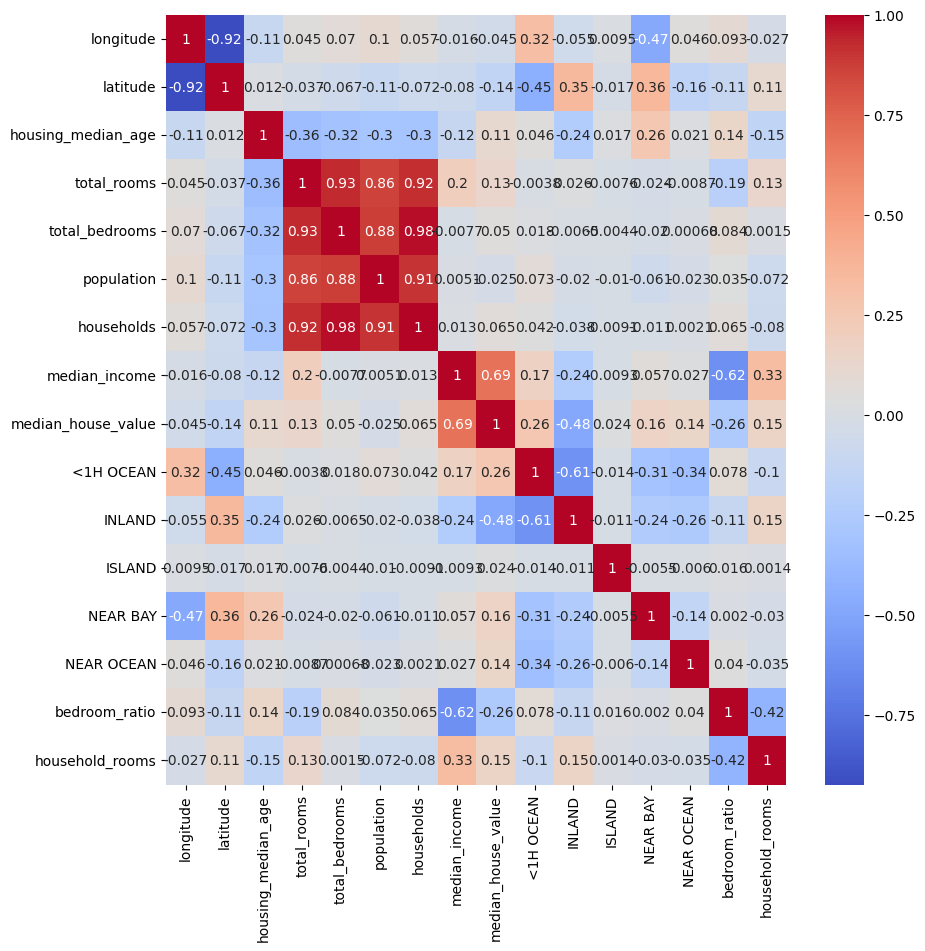

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

<Axes: xlabel='longitude', ylabel='latitude'>

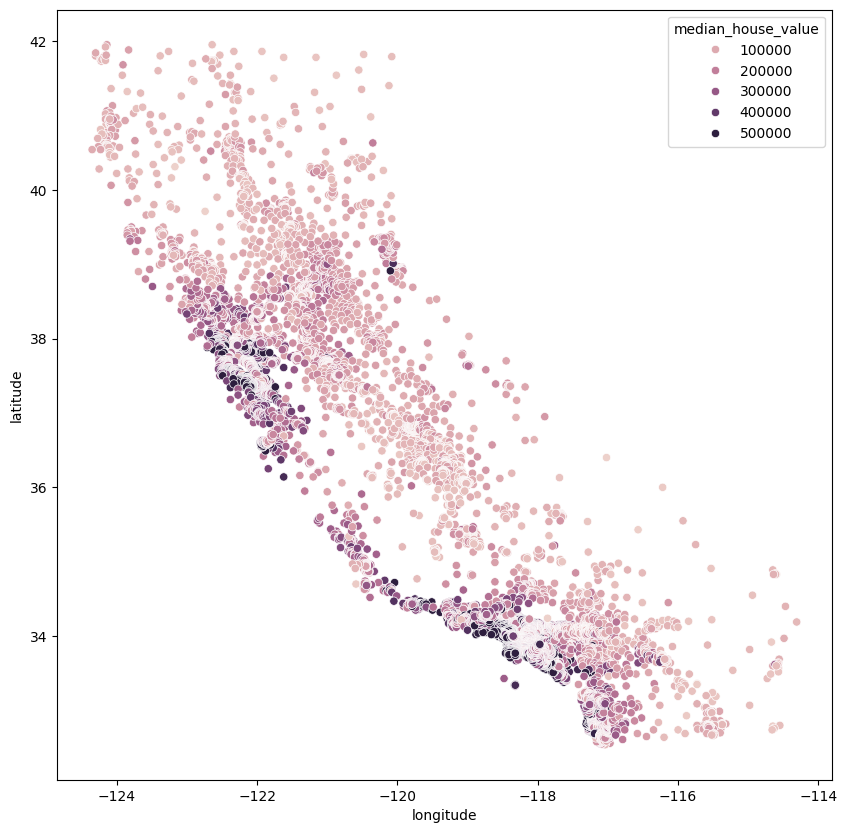

In [68]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='longitude',y='latitude',data=df,hue='median_house_value')

In [69]:
import numpy as np
df['total_bedrooms']=np.log(df['total_bedrooms']+1)
df['total_rooms']=np.log(df['total_rooms']+1)
df['population']=np.log(df['population']+1)
df['households']=np.log(df['households']+1)

#Linear Regression Model

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [71]:
scaler=StandardScaler()
df=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
0,-1.327314,1.051717,0.982163,-1.130950,-1.633628,-1.694198,-1.568921,2.345163,2.128819,-0.890239,-0.682713,-0.015645,2.828661,-0.384186,-1.146024,0.625395
1,-1.322323,1.042355,-0.606210,1.650545,1.313730,1.030718,1.449247,2.332632,1.313626,-0.890239,-0.682713,-0.015645,2.828661,-0.384186,-0.987254,0.324942
2,-1.332305,1.037674,1.855769,-0.450371,-1.104202,-1.108938,-1.104448,1.782939,1.258183,-0.890239,-0.682713,-0.015645,2.828661,-0.384186,-1.440514,1.150594
3,-1.337296,1.037674,1.855769,-0.638250,-0.813084,-0.949279,-0.812988,0.932970,1.164622,-0.890239,-0.682713,-0.015645,2.828661,-0.384186,-0.492925,0.155467
4,-1.337296,1.037674,1.855769,-0.312480,-0.572930,-0.932378,-0.583151,-0.013143,1.172418,-0.890239,-0.682713,-0.015645,2.828661,-0.384186,-0.706141,0.342549


In [72]:
X=df.drop('median_house_value',axis=1)
y=df['median_house_value']

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
14898,1.323010,-1.335593,-0.606210,0.948533,0.783472,0.849530,0.800914,0.294558,1.123294,-0.682713,-0.015645,-0.353524,-0.384186,-0.580352,0.190456
16474,-0.633538,-0.146619,-0.923885,0.950122,0.871938,0.526462,0.842839,-0.181736,-0.890239,-0.682713,-0.015645,-0.353524,2.602905,-0.378570,0.121738
14946,1.318019,-1.321550,-0.844466,0.231237,0.126076,0.456671,0.240160,-0.646711,1.123294,-0.682713,-0.015645,-0.353524,-0.384186,-0.389808,-0.099490
18477,-1.197543,0.630427,-0.923885,0.416958,0.214517,0.236054,0.254627,-0.085751,-0.890239,-0.682713,-0.015645,-0.353524,2.602905,-0.627084,0.187657
5327,0.584313,-0.755149,-0.129698,-1.843988,-1.027151,-1.410625,-0.757825,-0.767495,1.123294,-0.682713,-0.015645,-0.353524,-0.384186,3.057064,-1.277776


In [74]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [75]:
model=LinearRegression()
model.fit(X_train_scaled,y_train)

LinearRegression()

In [76]:
model.score(X_test_scaled,y_test)

0.6724311874497728

In [77]:
from sklearn.metrics import mean_squared_error
y_pred=model.predict(X_test_scaled)
mean_squared_error(y_test,y_pred)

0.3318898112217833

#Random Forest Model

In [78]:
from sklearn.ensemble import RandomForestRegressor

In [79]:
model2=RandomForestRegressor()
model2.fit(X_train_scaled,y_train)

RandomForestRegressor()

In [80]:
model2.score(X_test_scaled,y_test)

0.8228895569388459

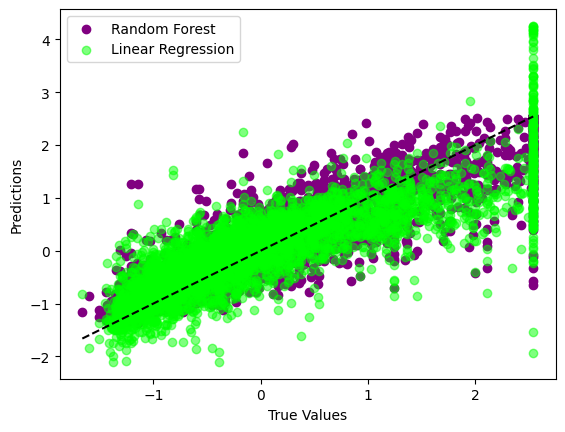

In [86]:
rf_pred = model2.predict(X_test_scaled)
lin_pred =model.predict(X_test_scaled)
plt.scatter(y_test, rf_pred,  label="Random Forest", color="purple")
plt.scatter(y_test, lin_pred,alpha=0.5 , label="Linear Regression", color="lime")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle="--", color="black")
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.legend()
plt.show()